In [1]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [3]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [4]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [5]:
#These cells should print the length of df
#df['app_id'].count().compute()

In [6]:
#len(df.index)#ritorna il numero di righe

In [7]:
#le colonne di interesse sono app_id (int64), review, 
#weighted_vote_scre,
#steam_purchase, received_for_free, recommended


In [8]:
#import the dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [9]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [10]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21668 entries, 0 to 21667
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21668 non-null  int64  
 1   app_id                          21668 non-null  int64  
 2   app_name                        21668 non-null  object 
 3   review_id                       21668 non-null  int64  
 4   language                        21668 non-null  object 
 5   review                          21629 non-null  object 
 6   timestamp_created               21668 non-null  int64  
 7   timestamp_updated               21668 non-null  int64  
 8   recommended                     21668 non-null  bool   
 9   votes_helpful                   21668 non-null  int64  
 10  votes_funny                     21668 non-null  int64  
 11  weighted_vote_score             21668 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,2065,292030,The Witcher 3: Wild Hunt,84791819,schinese,好玩好玩 画质很好，整体氛围特别真实，尤其是走到一些地方耳机一带特害怕太真实了，时间玩久了头晕,1610808190,1610808190,True,0,...,True,False,False,76561199022857850,17,4,1796.0,0.0,1796.0,1.608607e+09
1,2175,292030,The Witcher 3: Wild Hunt,84775760,schinese,剧情深入，对战操作强，卡牌也很好玩,1610785886,1610785886,True,0,...,True,False,False,76561199125317641,2,1,3421.0,2402.0,1820.0,1.611388e+09
2,3057,292030,The Witcher 3: Wild Hunt,84619873,czech,"10/10\nAno ano ano, Tohle je Hra s velkým H. U...",1610553362,1610553362,True,0,...,True,False,False,76561197968095997,509,184,10344.0,1822.0,10344.0,1.610534e+09
3,3295,292030,The Witcher 3: Wild Hunt,84575929,russian,Лучшая РПГ за последние 10 лет \n10/10 игра на...,1610487920,1610487920,True,1,...,True,False,False,76561198288476090,7,2,1884.0,1884.0,266.0,1.611338e+09
4,3773,292030,The Witcher 3: Wild Hunt,84500697,turkish,güzle,1610382901,1610382901,True,0,...,True,False,False,76561198969278992,4,1,2713.0,1405.0,2217.0,1.611136e+09


In [11]:
#df.duplicated() #Returns a boolean Series denoting duplicate rows
index=0
for i in df.duplicated():
    if i==True: print(index, "is true")
    index+=1

In [12]:
df.memory_usage( )

Index                                128
Unnamed: 0                        173344
app_id                            173344
app_name                          173344
review_id                         173344
language                          173344
review                            173344
timestamp_created                 173344
timestamp_updated                 173344
recommended                        21668
votes_helpful                     173344
votes_funny                       173344
weighted_vote_score               173344
comment_count                     173344
steam_purchase                     21668
received_for_free                  21668
written_during_early_access        21668
author.steamid                    173344
author.num_games_owned            173344
author.num_reviews                173344
author.playtime_forever           173344
author.playtime_last_two_weeks    173344
author.playtime_at_review         173344
author.last_played                173344
dtype: int64

In [13]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            39
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         30
author.last_played                 0
dtype: int64

<AxesSubplot:>

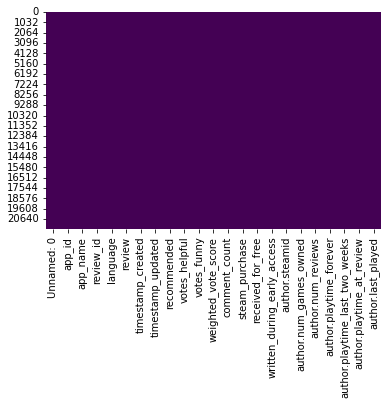

In [14]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

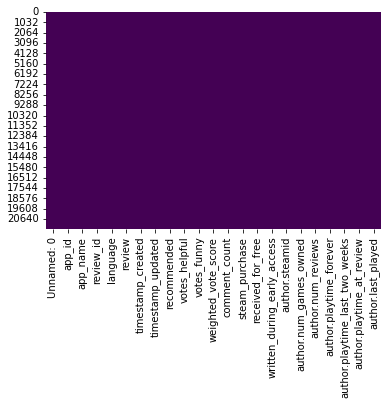

In [15]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

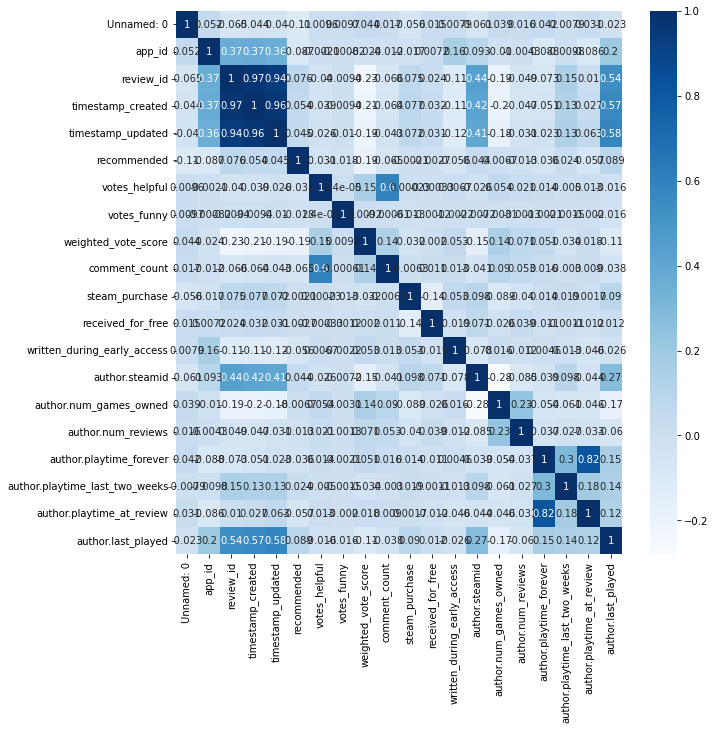

In [16]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

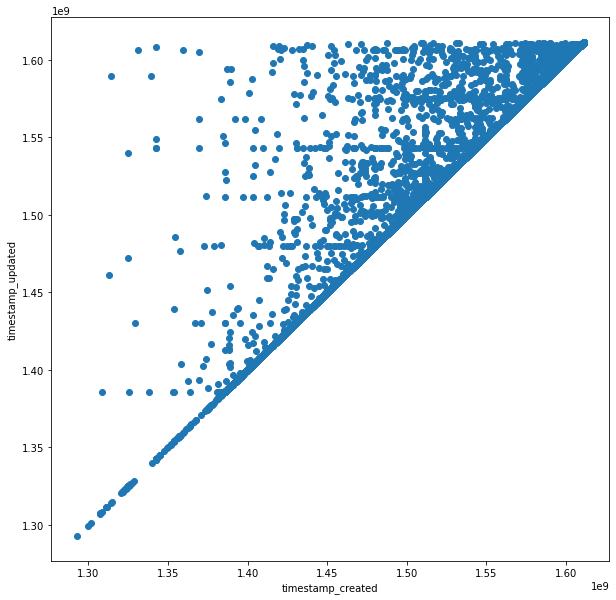

In [17]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [ ]:
df["app_name"].value_counts()

In [ ]:
#The only way to read the names is by saving the image and then zooming in
ax=df["app_name"].value_counts().plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=6)
ax.set_ylabel("count", fontsize=12)
plt.show()

### What applications have the best Weighted Vote Score?

In [20]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and take the ones with the highest values -----> we'll implement both approaches

In [21]:
#Here we just pick the 10 games with the highest score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
21529,Fairy Fencer F Advent Dark Force,0.974219
7578,Rust,0.965514
1704,Sid Meier's Civilization V,0.943974
17324,DARK SOULS™ III,0.943518
21096,Just Cause 3,0.943119
15888,Assassin's Creed Origins,0.942945
8503,Mount & Blade: Warband,0.941048
5315,DOOM Eternal,0.940742
21338,Northgard,0.938825
21448,Hollow Knight,0.938592


In [22]:
#MEAN METHOD
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Umbrella Corps,0.598618
Ancestors Legacy,0.555022
The End Is Nigh,0.523810
Don't Escape: 4 Days to Survive,0.520548
Slipstream,0.520000
BERSERK and the Band of the Hawk,0.514563
DRAGON QUEST HEROES™ II,0.512761
Urban Empire,0.501437
SENRAN KAGURA Peach Beach Splash,0.494025


### Which applications have the most and the least recommendations?

In [23]:
#recommended----> name of the col to use